In [101]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sn
from scipy.spatial import distance
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Classification

We have a given dataset 

$$
    (X, y) \in \mathbb{R}^{m \times (n+1)},
$$

where $m$ is the number of samples and $n$ is the number of features.

In the dateset we have the features

$$
    X \in \mathbb{R}^{m \times n}
$$

and the labels 

$$
    y \in \mathbb{N}^m.
$$

We say that 

$$
    (X^{(i)}, y^{(i)}) \in \mathbb{R}^{1 \times (n+1)}
$$

is the $i$-th example ($i = 1, \dots, m$) and 

$$
    X_j \in \mathbb{R}^m
$$ 

is the $j$-th feature vector ($j = 1, \dots, n$), such that 

$$
    X^{(i)}_j \in \mathbb{R}  
$$

is the $j$-th feature of the $i$-th example.

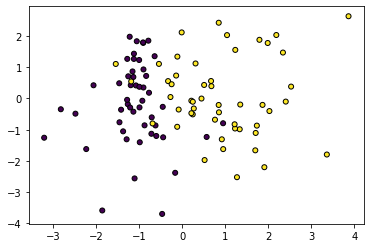

In [91]:
# Make example
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2, 
                           n_clusters_per_class=2, random_state=0)

# Plot data
plt.scatter(X[:, 0], X[:, 1], c=y, s=25, edgecolor='k')
plt.show()

In [92]:
# Split data in training and test set
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.3, shuffle=True, random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape 

((70, 2), (30, 2), (70,), (30,))

## Min-max normalization

$$
    X' = \frac{X - X_{min}}{X_{max} - X_{min}},
$$

In [93]:
# Normalize training and test set
scaler =  MinMaxScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
(X_train.min(), X_train.max()), (X_test.min(), X_test.max())

((0.0, 1.0), (-0.05789998297467719, 0.9182377628536007))

In [94]:
# Plot training and test sets
def plot_train_test(X_train, X_test, y_train, y_test):
    """ Plot training and test sets of a 2d classification problem side by side.
    
    Parameter
    ---------
        X_train : ndarray of shape (n_samples, 2)
            Training features.
        X_test : ndarray of shape (n_samples, 2)
            Test features.
        y_train : ndarray of shape (n_samples,)
            Training labels.
        y_test : ndarray of shape (n_samples,)
            Test labels.
    
    Return
    ------
        fig : 
            
        axs :
            
    """
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10.5, 3))
    axs[0].scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=20, edgecolors="k")
    axs[1].scatter(X_test[:, 0], X_test[:, 1], c=y_test, s=20, edgecolors="k")
    return fig, axs

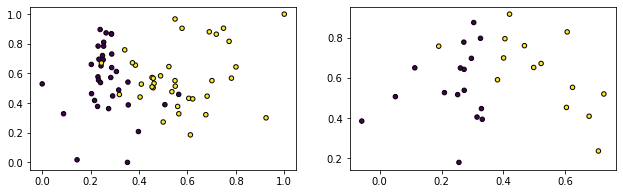

In [95]:
# Plot training and test sets
fig, axs = plot_train_test(X_train, X_test, y_train, y_test)

## K-nearest neighbors

### Hypothesis

In [96]:
def knn(X_train, y_train, X_test, k):
    """Simple k-nearest neighbor algorithm.
    
    Parameters
    ----------
        X_train : ndarray of shape (n_samples, n_features)
            Training features.
        y_train : ndarray of shape (n_samples,)
            Training labels.
        X_test : ndarray of shape (n_samples, n_features)
            Test features.
        k : int
            Number of neighbors.
            
    Returns
    -------
        classes : ndarray of shape (n_samples,)
            Predicted class labels.
    """
    
    # List to save the class predictions
    classes = []
    
    # Compute predictions for every sample
    for x_test in X_test:
        
        # List for distances from the sample to all datapoints
        distances = []
        
        # Compute distances from sample to all datapoints
        for x_train in X_train:
            distances.append(distance.euclidean(x_train, x_test))
        
        # Indices of the k nearest neighbors of the sample 
        neighbors_idx = np.argsort(distances)[:k]
        
        # Classes of the k nearest neighbors of the sample 
        neighbor_classes = y_train[neighbors_idx]
        
        # Most common class of the k nearest neighbors of the sample 
        classes.append(np.bincount(neighbor_classes).argmax())
        
    return np.array(classes)

In [97]:
# Make predictions
y_test_pred = knn(X_train, y_train, X_test, 2)

# Show results
score = np.sum(y_test_pred == y_test) / len(y_pred)
score

0.9

In [98]:
def plot_decision_regions(X_train, X_test, y_train, y_test, k):
    """ Plot KNN decision regions.
    
    Parameter
    ---------
        X_train : ndarray of shape (n_samples, 2)
            Training features.
        X_test : ndarray of shape (n_samples, 2)
            Test features.
        y_train : ndarray of shape (n_samples,)
            Training labels.
        y_test : ndarray of shape (n_samples,)
            Test labels.
    """
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, s=25, edgecolor='k')
    xx = np.linspace(X_test[:, 0].min(), X_test[:, 0].max(), 100)
    yy = np.linspace(X_test[:, 1].min(), X_test[:, 1].max(), 100)
    xx, yy = np.meshgrid(xx, yy)
    XX = np.column_stack([xx.ravel(), yy.ravel()])
    Z = knn(X_train, y_train, XX, k)
    plt.contourf(xx, yy, Z.reshape(xx.shape), alpha=0.5)
    plt.show()

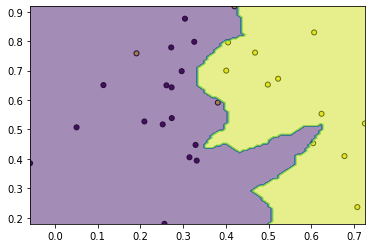

In [99]:
# Plot decision regions for KNN
plot_decision_regions(X_train, X_test, y_train, y_test, 2)

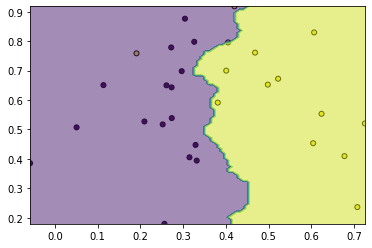

In [100]:
# Plot decision regions for KNN
plot_decision_regions(X_train, X_test, y_train, y_test, 5)